<a href="https://colab.research.google.com/github/wilburshi/LogisticRegression_tutorial/blob/main/LogisticRegression_ChosenValueCells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Neural Activity Analysis

Logistic regression can also be used to analyze neural activity profiles. In this tutorial, we will mainly focus on the predictive activity of chosen juice cells.

Chosen Juice Cells, Activity Profiles (Padoa-Schioppa, 2022)


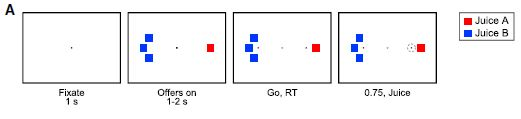

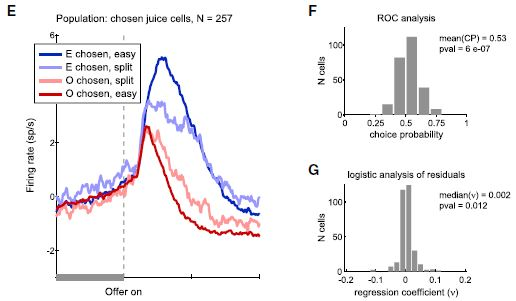

In [ ]:
from IPython.display import Image, display
print('Chosen Juice Cells, Activity Profiles (Padoa-Schioppa, 2022)')
!git clone https://github.com/wilburshi/LogisticRegression_tutorial.git # use it only for google colab 
display(Image('LogisticRegression_tutorial/pics/JC_tasks_for_CJcells.jpg', width=400, unconfined=True)) # use it only for google colab 
display(Image('LogisticRegression_tutorial/pics/CJcells.jpg', width=400, unconfined=True)) # use it only for google colab 
# display(Image('../pics/JC_tasks_for_CJcells.jpg', width=600, unconfined=True))
# display(Image('../pics/CJcells.jpg', width=600, unconfined=True))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Simple regression

### Step 1: load data

First, let's load example data file named as `goodTrials_CJcell.mat`. It only contains trials that monkey has successfully chosen one of the juice option. This file also contains the average firing rate of the pre-offer time window of a *chosen juice B cell* recorded in the same session.

`goodTrials_CJcells.mat` is a $N \times 5$, where $N$ is the number of the trials in this session, and in this example, $N =352$. The columns of this matrix indicated:

 - *column 1*: the trial number.

 - *column 2*: the quantity of juice A. The negative sign indicated that the stimulus/target is on the left side of the screen.
 
 - *column 3*: the quantity of juice B. The negative sign indicated that the stimulus/target is on the left side of the screen.
 
 - *column 4*: the chosen juice type, with 1 indicating A and 2 indicating B.
 
 - *column 5*: the average firing rate of pre-offer time window.

In [ ]:
# !git clone https://github.com/wilburshi/LogisticRegression_tutorial.git # use it only for google colab 
data = loadmat('LogisticRegression_tutorial/data/goodtrials_CJcell.mat')['goodTrials_CJcell'] # use it only for goole colab
data = loadmat('../data/goodtrials_CJcell.mat')['goodTrials_CJcell'] # loadmat is a function in scipy.io used to load Matlab data file

# Independent variables
triNum = np.abs(data[:,0]) # trial number
QA = np.abs(data[:,1]) # quantity of juice A
QB = np.abs(data[:,2]) # quantity of juice B
SideA = np.sign(data[:,1]) # side of target A. -1: left, 1: right, 0 forced choice
FR = np.abs(data[:,4])

# Dependent variables
CJ = data[:,3]-1 # the type of chosen juice. 0: chosen A, 1: chosen B

ind_forced = (data[:,1] == 0) | (data[:,2] == 0) # index of forced choice
ind_nonforced = ~ind_forced

### Step 2: probit regression fitting
we use probit regression to fit the choice pattern. the model is as follows:

$ choice B = \Phi(X) $

$ X = a_0 + a_1 log(q_E/q_O) + a_2 r_E $

where $choice B = 1$ if juice B is chosen and 0 otherwise. $\Phi$ is the cumulative function of a Gaussian distribution (probit link). Each *chosen juice cell* encodes the one juice type; we refer to the encoded juice as juice E and to the other juice
as juice O. Therefore, $q_E$ and $q_O$ are the juice quantity for E and O in each trial. $r_E$ is the preoffer activity of *chosen juice cell*. $a_0$, $a_1$ and $a_2$ are the fitted parameters, from which we define the relative value ($\rho$) between A and B as $\rho = exp(-a_0/a_1)$ and the sigmoid steepness ($\eta$) as $\eta = a_1$. Relative value measures the indifference point at which the value of A and B are the same, that is, $1 q_A = \rho q_B$; steepness reflects the choice accuracy which is inverse to the choice variability. We also define the initial bias $\nu$ as $\nu = a_2/a_1$, which quantify how much the preoffer activity of the *chosen juice cell* captures the initial conditions of the dynamic system that can substantially influence the network dynamics and further bias the choice outcome.

In [ ]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit

In [ ]:
# remove the forced choice (0A or 0B)
Y = CJ[ind_nonforced]
X1 = np.log(QB[ind_nonforced]/QA[ind_nonforced]) # log ratio
X2 = FR[ind_nonforced]
const = np.ones(X1.shape)

# probit regression
model = Probit(Y, np.transpose([const, X1, X2]))
probit_model = model.fit()
betas = probit_model.params
# print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.162282
         Iterations 9


### Step 3: reporting the results

In [ ]:
rho = np.exp(-betas[0]/betas[1])
print('relative value ρ is: ', np.array2string(rho))
eta = betas[1]
print('steepness η is: ', np.array2string(eta))
nu = betas[2]/betas[1]
print('initial bias 𝜈 is: ', np.array2string(nu))

relative value ρ is:  1.92471655
steepness η is:  6.10513441
initial bias 𝜈 is:  0.00121576
